In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


**Loading Data Frame**

In [2]:
df=pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv',sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df=df.drop(['id'],axis=1)

**Check for Null Values and creation of new column "BMI"**

In [5]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df['age']=df['age']//365

In [9]:
df['BMI']=df['weight']/(df['height']/100)**2

In [10]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [11]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


**Outlier Detection and Removal**

In [12]:
import seaborn as sns
from scipy import stats

1. Weight

<AxesSubplot:>

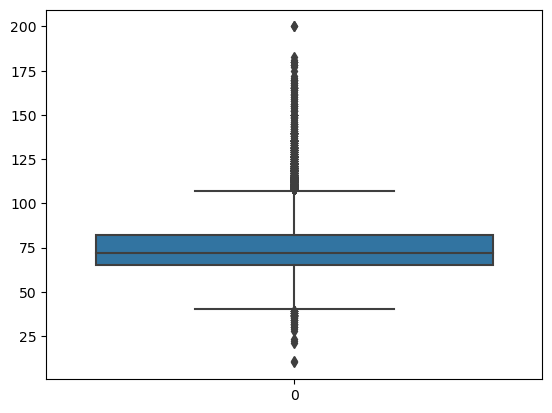

In [13]:
sns.boxplot(df['weight'])

In [14]:
flag=0
while flag==0:
        z=np.abs(stats.zscore(df["weight"]))
        if len(np.where(z>3)[0])>0:
            print(len(np.where(z>3)[0]))
            df=df[(z<3)]
            print(df.shape)
        else:
            flag=1

702
(69298, 13)
302
(68996, 13)
81
(68915, 13)


<AxesSubplot:>

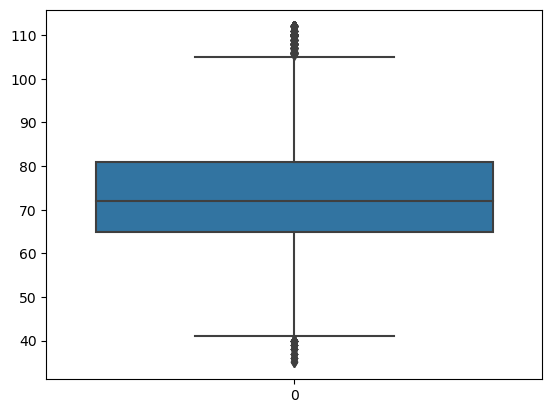

In [15]:
sns.boxplot(df['weight'])

2. Height 

<AxesSubplot:>

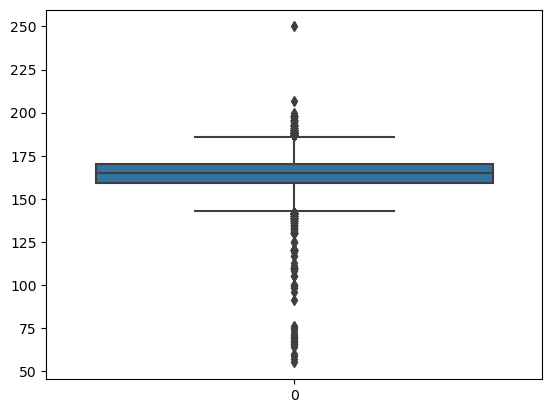

In [16]:
sns.boxplot(df['height'])

In [17]:
flag=0
while flag==0:
        z=np.abs(stats.zscore(df["height"]))
        if len(np.where(z>3)[0])>0:
            print(len(np.where(z>3)[0]))
            df=df[(z<3)]
            print(df.shape)
        else:
            flag=1

264
(68651, 13)
112
(68539, 13)


<AxesSubplot:>

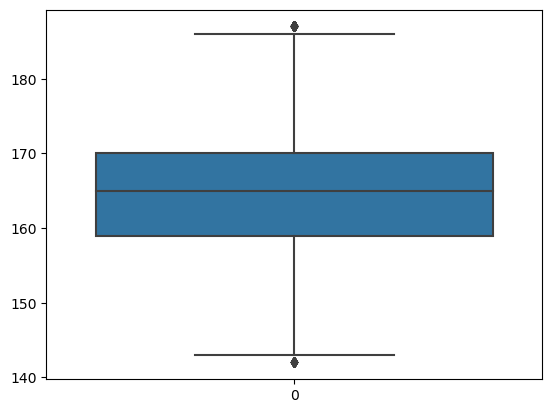

In [18]:
sns.boxplot(df.height)

3. ap_hi

<AxesSubplot:>

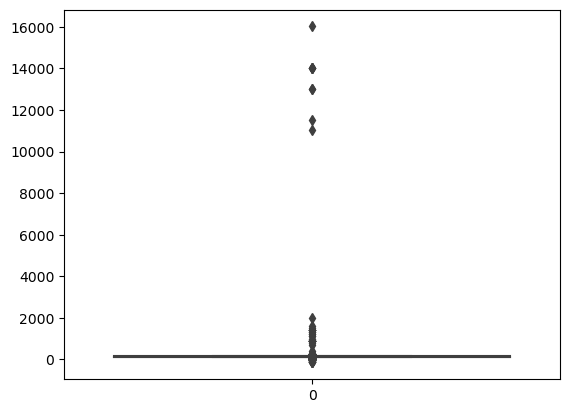

In [19]:
sns.boxplot(df.ap_hi)

In [20]:
flag=0
while flag==0:
        z=np.abs(stats.zscore(df["ap_hi"]))
        if len(np.where(z>3)[0])>0:
            print(len(np.where(z>3)[0]))
            df=df[(z<3)]
            print(df.shape)
        else:
            flag=1

38
(68501, 13)
507
(67994, 13)
655
(67339, 13)
18
(67321, 13)


<AxesSubplot:>

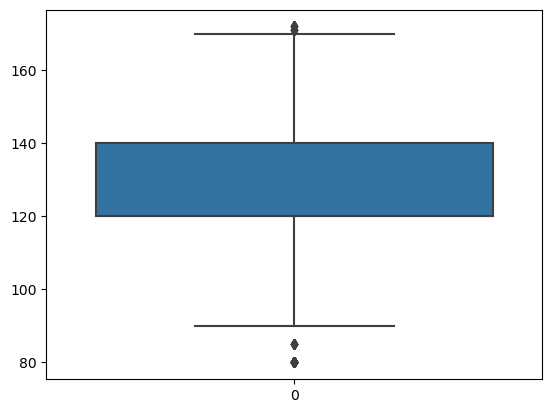

In [21]:
sns.boxplot(df.ap_hi)

4. ap_lo 

<AxesSubplot:>

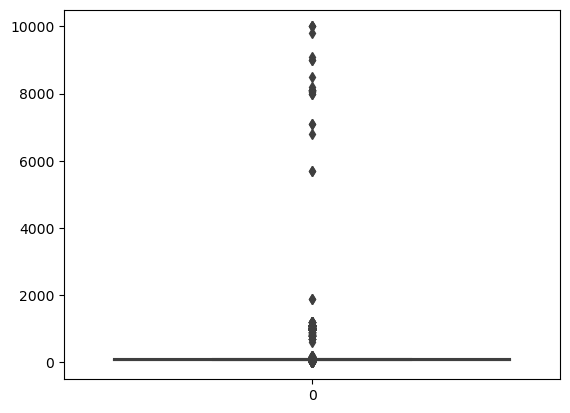

In [22]:
sns.boxplot(df.ap_lo)

In [23]:
flag=0
while flag==0:
        z=np.abs(stats.zscore(df["ap_lo"]))
        if len(np.where(z>3)[0])>0:
            print(len(np.where(z>3)[0]))
            df=df[(z<3)]
            print(df.shape)
        else:
            flag=1

779
(66542, 13)
540
(66002, 13)
11
(65991, 13)


<AxesSubplot:>

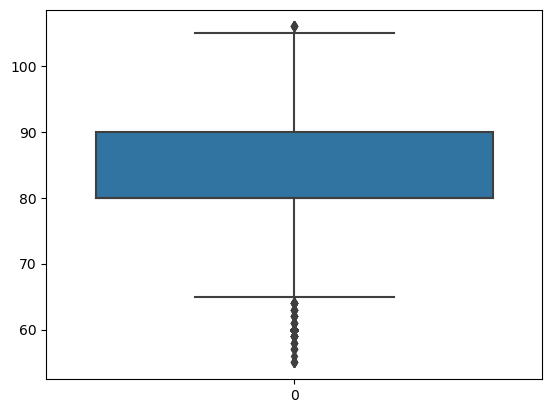

In [24]:
sns.boxplot(df.ap_lo)

5. BMI 

<AxesSubplot:>

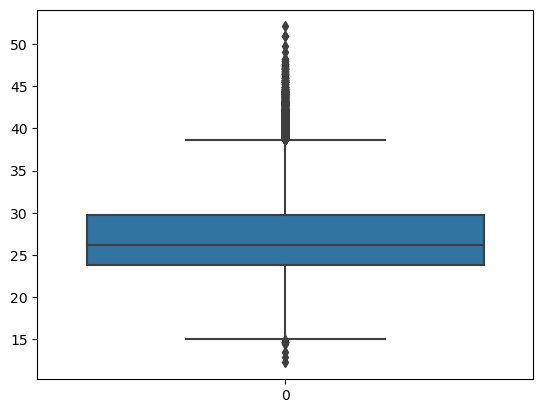

In [25]:
sns.boxplot(df.BMI)

In [26]:
flag=0
while flag==0:
        z=np.abs(stats.zscore(df["BMI"]))
        if len(np.where(z>3)[0])>0:
            print(len(np.where(z>3)[0]))
            df=df[(z<3)]
            print(df.shape)
        else:
            flag=1

544
(65447, 13)
199
(65248, 13)
62
(65186, 13)
29
(65157, 13)


<AxesSubplot:>

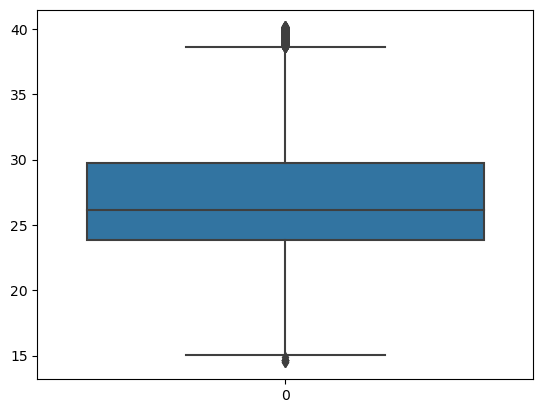

In [27]:
sns.boxplot(df.BMI)

In [28]:
import matplotlib.pyplot as plt

**Correlation Matrix**

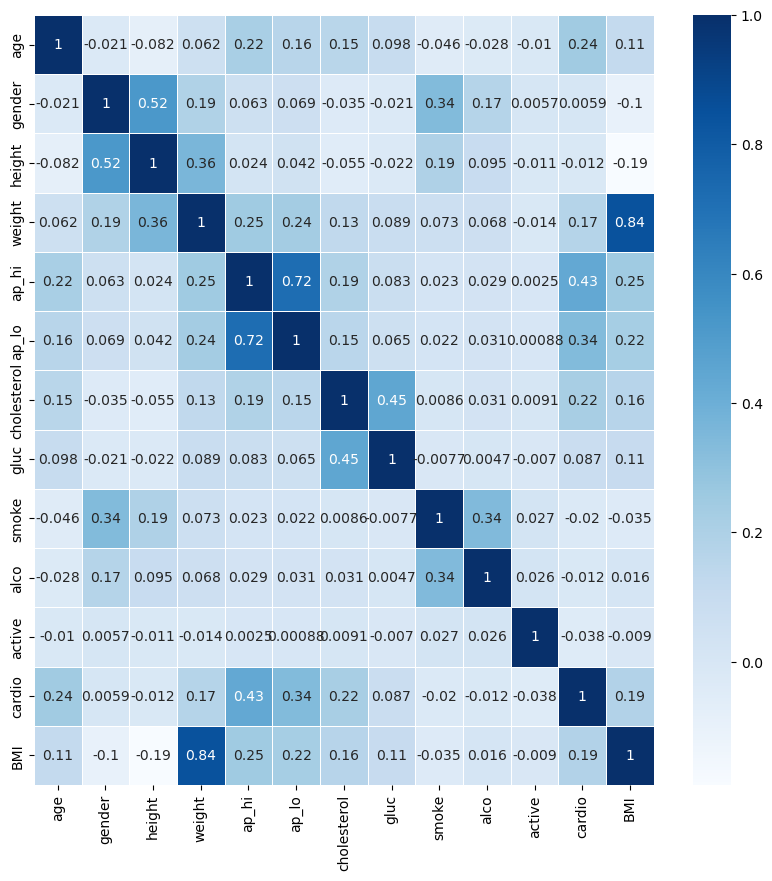

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.5,annot=True,cmap='Blues')
plt.show()

In [30]:
X=df.drop(['gender','height',"gluc",'smoke','alco','active','cardio'],axis=1)

In [31]:
y=df['cardio']

**Splitting Dataset into Train and Test set**

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [33]:
X_train.shape

(52125, 6)

In [34]:
y_train.shape

(52125,)

In [35]:
X_test.shape

(13032, 6)

In [36]:
y_test.shape

(13032,)

**Creation of pipeline**

In [37]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [38]:
pipelines = {
    'CatB':make_pipeline(StandardScaler(), CatBoostClassifier(eval_metric='Accuracy',verbose=1000)),
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'gnb':make_pipeline(StandardScaler(), GaussianNB()),
    'dtc':make_pipeline(StandardScaler(),DecisionTreeClassifier()),
    'xg':make_pipeline(StandardScaler(),XGBClassifier()),
    'svc':make_pipeline(StandardScaler(), SVC()),
}


**Training of model**

In [39]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

Learning rate set to 0.055733
0:	learn: 0.7252374	total: 69.1ms	remaining: 1m 9s
999:	learn: 0.7495827	total: 11.2s	remaining: 0us


In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

al=[]
ac=[]
pre=[]
rec=[]
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    al.append(algo)
    ac.append(accuracy_score(y_test, yhat))
    pre.append(precision_score(y_test, yhat))
    rec.append(recall_score(y_test, yhat))
    print(algo,'Accuracy -', accuracy_score(y_test, yhat))
    print(algo,'Recall Score - ',recall_score(y_test,yhat))
    print(algo,'Precision - ',precision_score(y_test,yhat))

CatB Accuracy - 0.7242940454266421
CatB Recall Score -  0.6615530602562075
CatB Precision -  0.7421930447125621
lr Accuracy - 0.7209177409453652
lr Recall Score -  0.6398861300015816
lr Precision -  0.7484276729559748
rc Accuracy - 0.7206108041743401
rc Recall Score -  0.6302388106911276
rc Precision -  0.7535930408472012
rf Accuracy - 0.6929864947820749
rf Recall Score -  0.6675628657282935
rf Precision -  0.6897058823529412
gb Accuracy - 0.7262891344383057
gb Recall Score -  0.6712003795666613
gb Precision -  0.7404047452896022
gnb Accuracy - 0.7152394106813996
gnb Recall Score -  0.6220148663609046
gnb Precision -  0.74857251617815
dtc Accuracy - 0.6273020257826888
dtc Recall Score -  0.5786810058516527
dtc Precision -  0.6252563226247437
xg Accuracy - 0.7223756906077348
xg Recall Score -  0.6566503242131899
xg Precision -  0.7415609930344704
svc Accuracy - 0.7242940454266421
svc Recall Score -  0.637988296694607
svc Precision -  0.7557137504683402


**Performance metrics of various models**

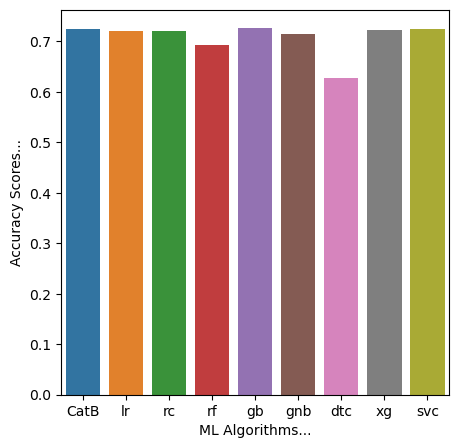

In [41]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Accuracy Scores...')
ax=sns.barplot(x=al,y=ac)
plt.show()

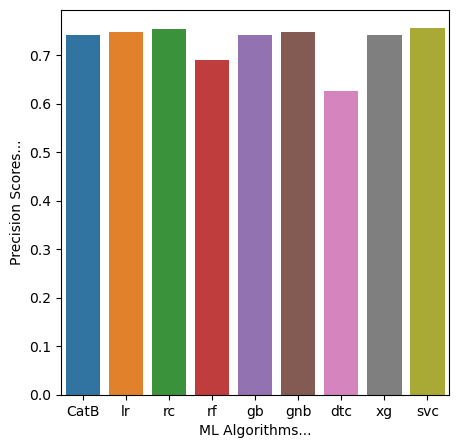

In [42]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Precision Scores...')
ax=sns.barplot(x=al,y=pre)
plt.show()

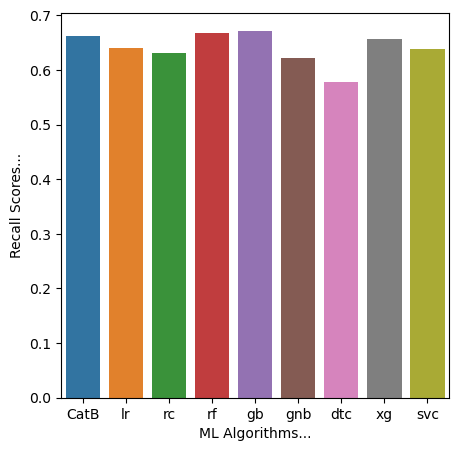

In [43]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Recall Scores...')
ax=sns.barplot(x=al,y=rec)
plt.show()

**Development of Stacked Classifier**

In [44]:
from sklearn.ensemble import StackingClassifier

In [51]:
CatB = CatBoostClassifier(verbose=1000,eval_metric='Accuracy')
rc = RidgeClassifier()
gb = GradientBoostingClassifier()
xg = XGBClassifier()
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()

stregr = StackingClassifier(estimators=[('xg', xg),('svc',svc),('gb',gb)],
                           final_estimator=lr)

pipeline = make_pipeline(
    StandardScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
yhat = pipeline.predict(X_test)

# Evaluate the model
print('Accuracy -', accuracy_score(y_test, yhat))
print('Recall Score - ',recall_score(y_test,yhat))
print('Precision - ',precision_score(y_test,yhat))

Accuracy - 0.7272099447513812
Recall Score -  0.6781591016922347
Precision -  0.7382920110192838


In [60]:
al.append('stacked regressor')
ac.append(0.7272099447513812)
pre.append(0.7382920110192838)
rec.append(0.6781591016922347)

In [61]:
for i in range(len(ac)):
    ac[i]=ac[i]*100

In [63]:
for i in range(len(pre)):
    pre[i]=pre[i]*100

In [65]:
for i in range(len(rec)):
    rec[i]=rec[i]*100

**Evaluation of Stacked Classifier with previously trained models** 

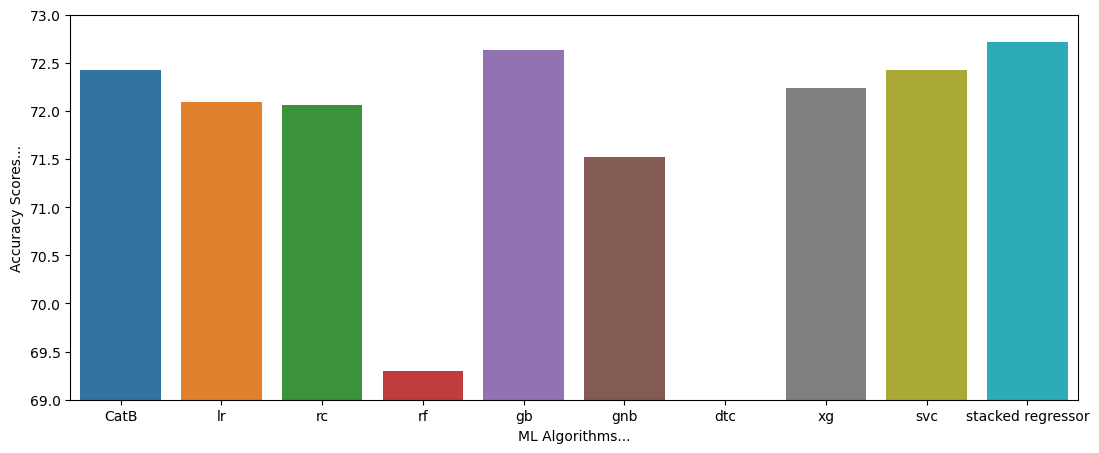

In [83]:
plt.figure(figsize=(13,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Accuracy Scores...')
ax=sns.barplot(x=al,y=ac)
ax.set_ylim(69,73)
plt.show()

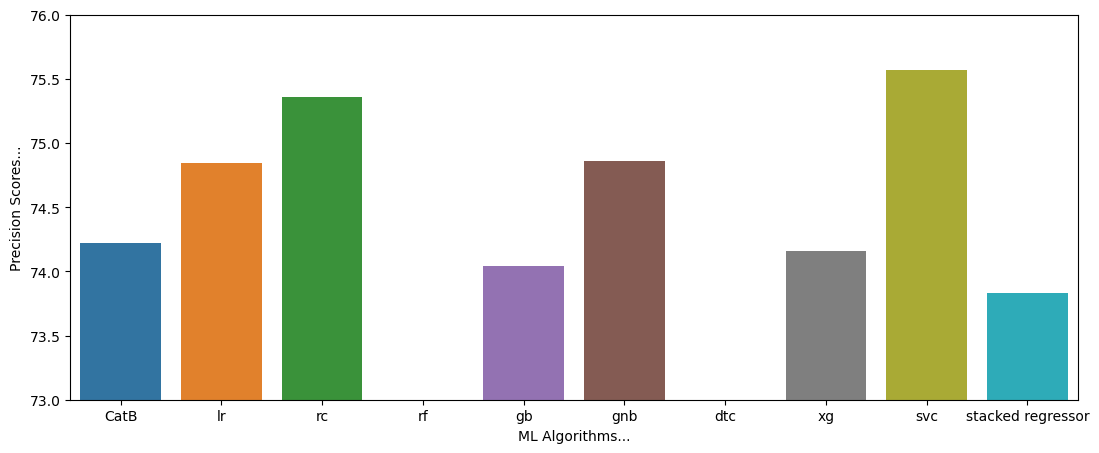

In [84]:
plt.figure(figsize=(13,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Precision Scores...')
ax=sns.barplot(x=al,y=pre)
ax.set_ylim(73,76)
plt.show()

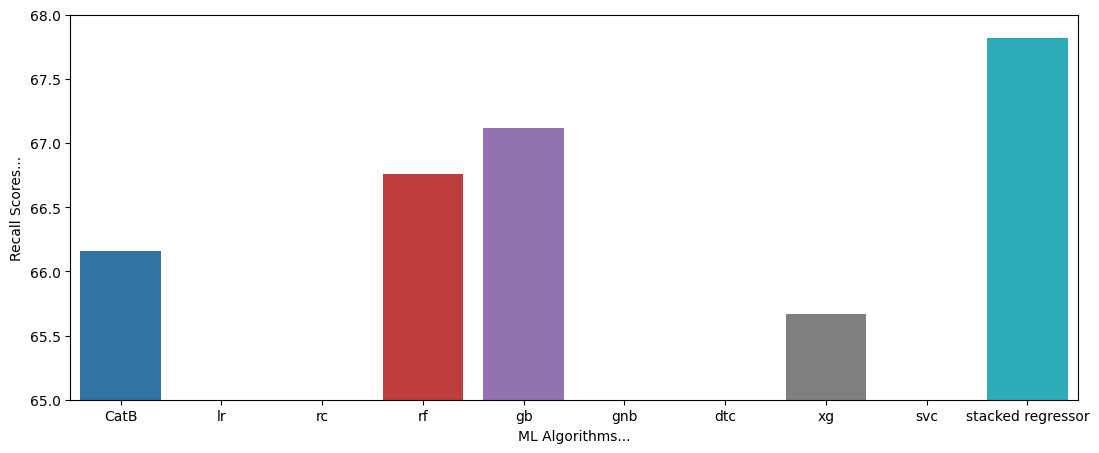

In [89]:
plt.figure(figsize=(13,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Recall Scores...')
ax=sns.barplot(x=al,y=rec)
ax.set_ylim(65,68)
plt.show()

# The Stacked Regressor has superior Recall and Accuracy as compared to the singular models!

**Do upvote the notebook if you find the work worthy!**